<h2>Sentiment Analysis On British Airways Reviews <h2>

<p><b>Overview: <b>In this project I am carrying out analysis on the sentiment of customers based on their reviews, the data was drawn from the <a href='airlinequality.com'> airlinequality.com </a> website which allows for people to comment and give reviews on services rendered to them by various airline, the data has already been scraped in a different notebook and saved to a csv, here we will be reading that csv and carry out necessary data cleaning and preparation techniques, then go ahead to gauged user emotion(sentiment) then make plots to visualize certain information and give better insight to the data.</p>

<h5><b>Aim: <b>Draw insights from user reviews on british airways airline by determining and analysing the sentiments in their comments as well as plotting graphs that will give a more visual interpretation to the data in order to aid better business decisions and note areas of improvement. <h5>

In [1]:
#Importing some libraries
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#Importing some more libraries for natural language processing
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

In [4]:
#Reading/Loading the data
data = pd.read_csv("scraped_review.csv")
data.head(5)

,reviews
0,Top Ten REASONS to not use British Airways To ...
1,Easy check in on the way to Heathrow. The flig...
2,Online check in worked fine. Quick security ch...
3,. The BA first lounge at Terminal 5 was a zoo...
4,Paid a quick visit to Nice yesterday from Heat...


In [5]:
#Converting all text to lowercase
data['reviews'] = data.reviews.apply(lambda x:x.lower())

data['reviews'] = data['reviews'].str.replace(r'[^\w\s]+', '')  

data.head(5)

,reviews
0,top ten reasons to not use british airways to ...
1,easy check in on the way to heathrow the fligh...
2,online check in worked fine quick security che...
3,the ba first lounge at terminal 5 was a zoo ...
4,paid a quick visit to nice yesterday from heat...


In [6]:
#Removing irrelevant words and abbreviations
data['reviews'] = data['reviews'].apply(lambda x: " ".join([w for w in x.split() if len(w) > 3]))
data.head(5)

,reviews
0,reasons british airways aware notice travel yo...
1,easy check heathrow flight time with issues re...
2,online check worked fine quick security check ...
3,first lounge terminal dirty tables used tablew...
4,paid quick visit nice yesterday from heathrow ...


In [7]:
#Function to tokenize the entire dataframe and filter stopwords
def data_processing(text):
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [8]:
data['cleaned_text'] = data['reviews'].apply(data_processing)
data.head(5)

,reviews,cleaned_text
0,reasons british airways aware notice travel yo...,reasons british airways aware notice travel ri...
1,easy check heathrow flight time with issues re...,easy check heathrow flight time issues return ...
2,online check worked fine quick security check ...,online check worked fine quick security check ...
3,first lounge terminal dirty tables used tablew...,first lounge terminal dirty tables used tablew...
4,paid quick visit nice yesterday from heathrow ...,paid quick visit nice yesterday heathrow decid...


In [9]:
#Importing some more natural language processing tools
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

In [10]:
SIA = SentimentIntensityAnalyzer()

In [11]:
#Determining polarity of reviews and ranking the various emotions
data['polarity_score']=data.reviews.apply(lambda x:SIA.polarity_scores(x)['compound'])

data['negative_score']=data.reviews.apply(lambda x:SIA.polarity_scores(x)['neg'])
data['positive_score']=data.reviews.apply(lambda x:SIA.polarity_scores(x)['pos'])
data['neutral_score']=data.reviews.apply(lambda x:SIA.polarity_scores(x)['neu'])

data['sentiment']=''

data.loc[data.polarity_score>0,'sentiment']='POSITIVE'
data.loc[data.polarity_score<0,'sentiment']='NEGATIVE'
data.loc[data.polarity_score==0,'sentiment']='NEUTRAL'


data.head(5)

,reviews,cleaned_text,polarity_score,negative_score,positive_score,neutral_score,sentiment
0,reasons british airways aware notice travel yo...,reasons british airways aware notice travel ri...,0.9439,0.082,0.153,0.765,POSITIVE
1,easy check heathrow flight time with issues re...,easy check heathrow flight time issues return ...,0.4939,0.038,0.094,0.868,POSITIVE
2,online check worked fine quick security check ...,online check worked fine quick security check ...,0.8479,0.000,0.389,0.611,POSITIVE
3,first lounge terminal dirty tables used tablew...,first lounge terminal dirty tables used tablew...,-0.6743,0.161,0.107,0.733,NEGATIVE
4,paid quick visit nice yesterday from heathrow ...,paid quick visit nice yesterday heathrow decid...,0.9638,0.055,0.179,0.766,POSITIVE


In [12]:
#Dropping null rows
data.dropna(how='any',axis='rows',inplace=True)

In [1]:
#Plotting Bar chart to represent the count of different sentiments in the data
from matplotlib import style
style.use('ggplot')

sns.countplot(x='sentiment', data = data)
plt.savefig("visualizations/sentiment_plot.png")

NameError: name 'sns' is not defined

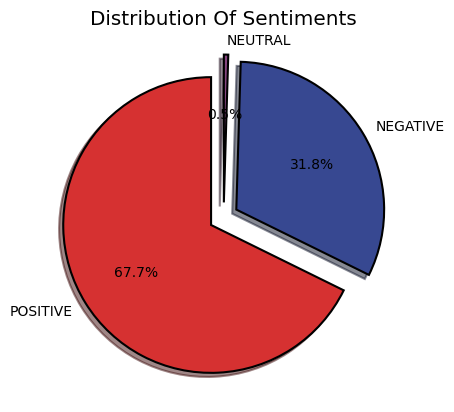

In [14]:
#Plotting a pie chart to represent the distribution of the different sentiments
colors = ('#d63131','#374891','#864680')
wp = {'linewidth':1.5, 'edgecolor':'black'}

tags = data['sentiment'].value_counts()
explode = (0.1,0.1,0.1)

tags.plot(kind = 'pie', autopct = '%1.1f%%', shadow = True, colors = colors, startangle = 90, wedgeprops = wp, explode = explode, label = '')

plt.title('Distribution Of Sentiments')
plt.savefig('visualizations/sentiment_distribution.png')

In [15]:
#Saving all positive texts to 'pos_texts'
pos_texts = data[data.sentiment == 'POSITIVE']
pos_texts = pos_texts.sort_values(['polarity_score'], ascending= False)
pos_texts.head(3)

,reviews,cleaned_text,polarity_score,negative_score,positive_score,neutral_score,sentiment
944,london heathrow dubai this first time flown fi...,london heathrow dubai first time flown first c...,0.9982,0.017,0.302,0.681,POSITIVE
2373,fantastic flight club world with british airwa...,fantastic flight club world british airways lo...,0.9981,0.008,0.400,0.592,POSITIVE
409,supposed with aeroflot 23rd december moscow be...,supposed aeroflot 23rd december moscow russia ...,0.9979,0.086,0.304,0.610,POSITIVE


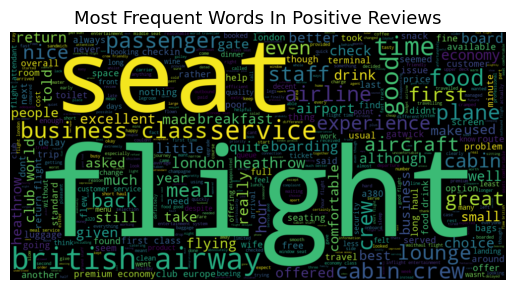

In [16]:
#Creating a wordcloud to show most frequent words in positive comments
p_text = ' '.join([word for word in pos_texts['cleaned_text']])

p_wordcloud = WordCloud(max_words=500, width=1000, height=500).generate(p_text)
plt.imshow(p_wordcloud, interpolation='bilinear')

plt.axis("off")
plt.title("Most Frequent Words In Positive Reviews", fontsize=13)

plt.savefig('visualizations/pos_wordcloud.png')
plt.show()

In [17]:
#Saving all positive texts to 'neg_texts'
neg_texts = data[data.sentiment == 'NEGATIVE']
neg_texts = neg_texts.sort_values(['polarity_score'], ascending= False)
neg_texts.head(3)

,reviews,cleaned_text,polarity_score,negative_score,positive_score,neutral_score,sentiment
1914,return journey gatwick dubrovnik outward journ...,return journey gatwick dubrovnik outward journ...,-0.0018,0.074,0.057,0.869,NEGATIVE
3273,used return trip denver very disappointed plan...,used return trip denver disappointed plane tir...,-0.0038,0.189,0.189,0.622,NEGATIVE
205,left late issue with provisioning plane arrive...,left late issue provisioning plane arrived lat...,-0.0041,0.063,0.072,0.865,NEGATIVE


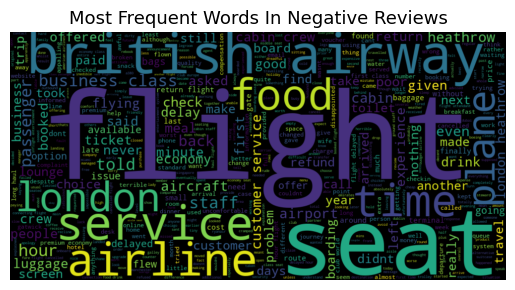

In [18]:
#Creating a wordcloud to show most frequent words in negative comments
n_text = ' '.join([word for word in neg_texts['cleaned_text']])

n_wordcloud = WordCloud(max_words=500, width=1000, height=500).generate(n_text)
plt.imshow(n_wordcloud, interpolation='bilinear')

plt.axis("off")
plt.title("Most Frequent Words In Negative Reviews", fontsize=13)

plt.savefig('visualizations/neg_wordcloud.png')
plt.show()